# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 11 - Decision Tree**
---

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. El objetivo de hoy es:

1. Ajustar el modelo a un Decision Tree
   
2. Extraer las métricas
   
3. Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd 
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# =====================
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# =======================
import warnings
warnings.filterwarnings('once')

In [2]:
# cargamos el dataset
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
country,,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.285714,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.383060,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.214286,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


In [3]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'region', 'restaurant_price_index'], axis = 1)
y = df["restaurant_price_index_normal"]

In [4]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeRegressor(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

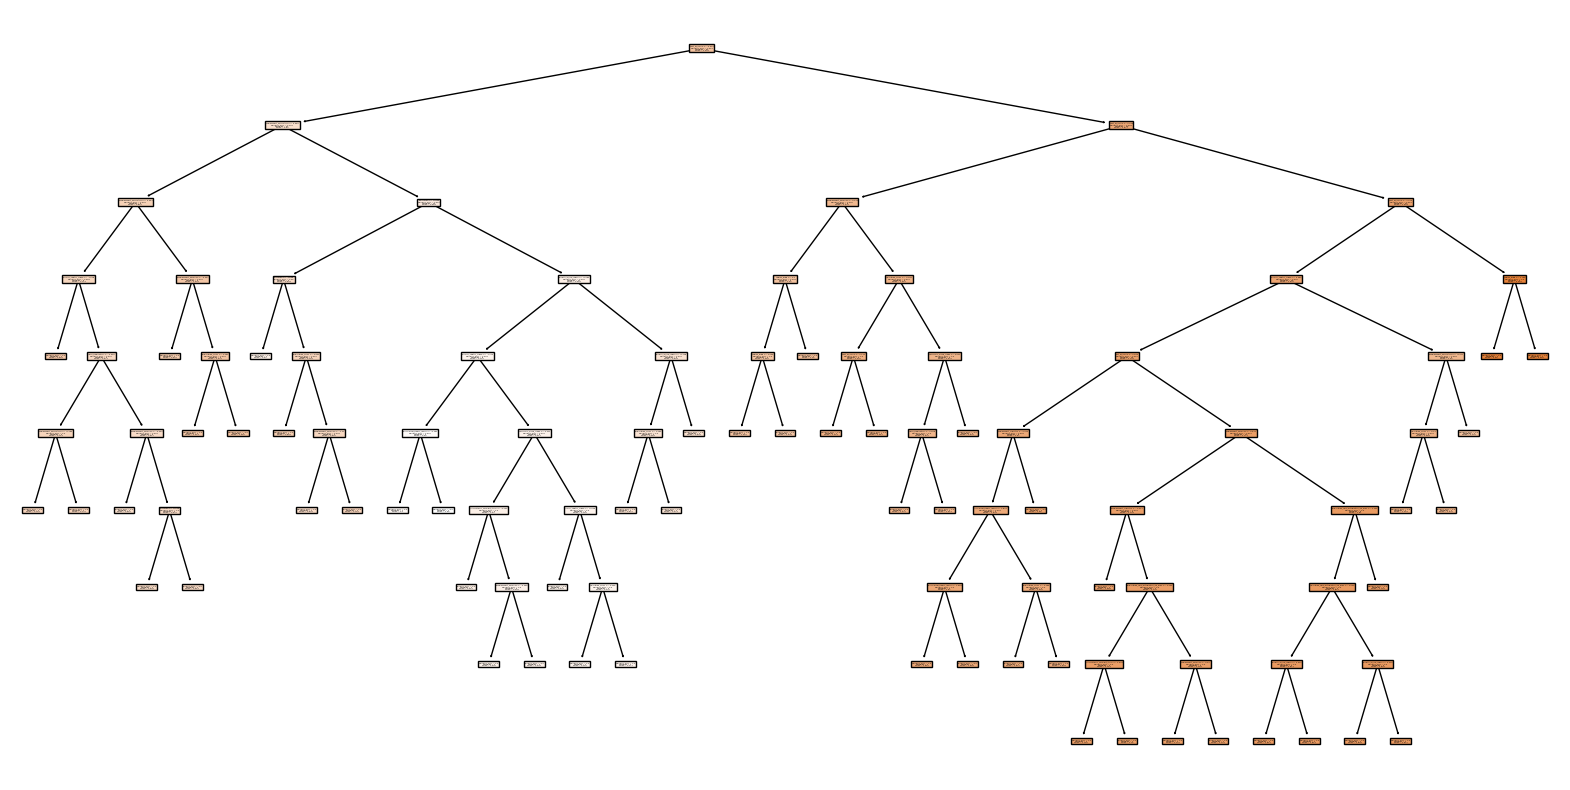

In [6]:
# ploteamos el árbol
fig = plt.figure(figsize = (20,10))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

In [7]:
# max features para el modelo, raiz cuadrada del número de variables perdictoras 
max_features = np.sqrt(len(x_train.columns))
max_features

4.123105625617661

In [8]:
# max depth
print(arbol.tree_.max_depth)

9


In [9]:
# hacemos las predicciones sobre los dos set de datos el x_test y el x_train
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [10]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
dt_results1 = spf.metricas_rlin(y_test, y_pred_test_dt, y_train, y_pred_train_dt, 'Decision Tree I')
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.138299,0.026285,0.162125,0.91682,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.00000,train,Decision Tree I


Tenemos un caso claro de overfitting ya que el `R2` del train es 1 y los errores 0. Además, la diferencia entre el `kappa` de train y el de test es bastante mayor que 0.1 (0.29).

In [11]:
# definimos un diccionario con los hiperparámetros que queremos modificar
param = {"max_depth": [2, 4, 5], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, llegamos hasta 5, ya que teníamos 9
        "max_features": [1, 2, 3, 4],# Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        "min_samples_split": [10, 15, 20], # ponemos valores bajos porque solo tenemos 66 filas
        "min_samples_leaf": [10, 15, 20], # ponemos valores bajos porque solo tenemos 66 filas
         "random_state": [99]} # semilla para que los resultados no varíen al volver a ejecutar

In [12]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True,
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [13]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 5], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'random_state': [99]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [14]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=2, max_features=3, min_samples_leaf=10,
                      min_samples_split=10, random_state=99)

El mejor modelo es el que tiene los siguientes parámetros:
- `max_depth` = 2
- `max_features` = 3
- `min_samples_split` = 10
- `min_samples_leaf` = 10

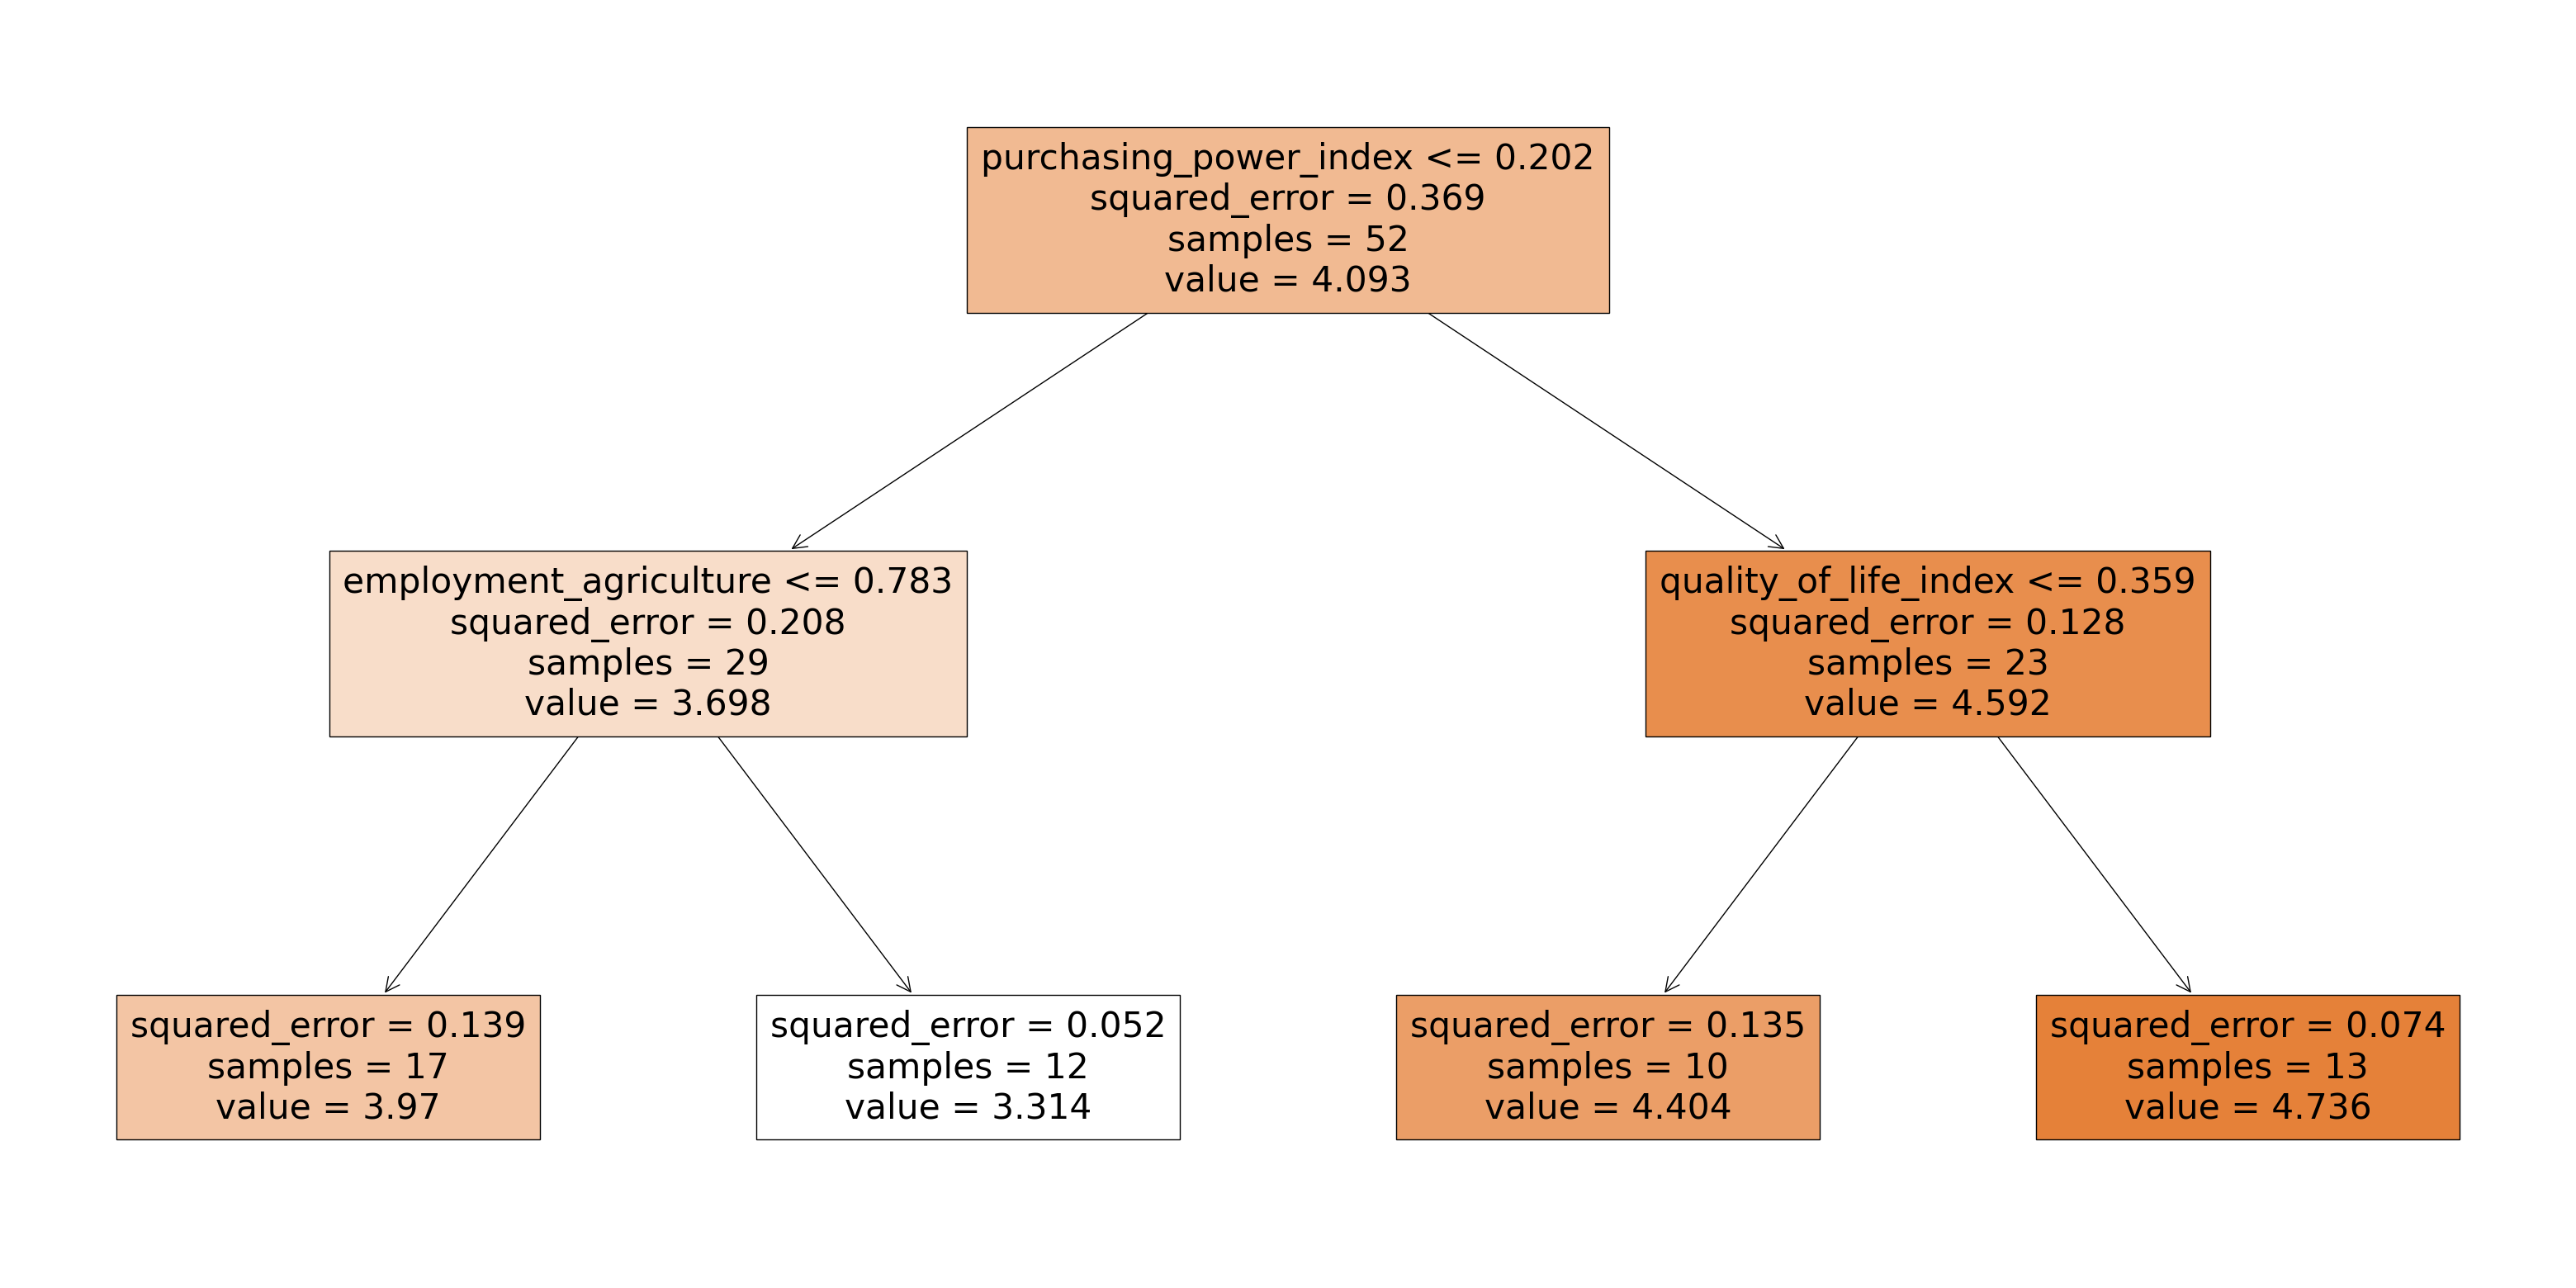

In [15]:
# veamos ahora que pinta tiene nuestro árbol
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True)
plt.show();

In [16]:
# hacemos las predicciones sobre los dos set de datos el x_test y el x_train
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [17]:
# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados
dt_results2 = spf.metricas_rlin(y_test, y_pred_test_dt2, y_train, y_pred_train_dt2, 'Decision Tree II')
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


En este caso las métricas del test son mejores que las del train, llegando casi al límite del 0.1 (0.099) de diferencia en el `R2`. No obastante, la diferencia en los errores es menor, así que podría resultar un modelo aceptable.

In [18]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.138299,0.026285,0.162125,0.916820,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


Aunque el segundo modelo pueda estar rozando el underfitting el primero es un caso claro de overfitting así que sería mejor el segundo (`Decision Tree II`).

In [19]:
# cargamos los resultados de la regresión lineal para poder compararlos
df_linear_results = pd.read_csv("datos/soci_econ_country_profiles_metricas_RL.csv", index_col = 0)
df_linear_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.152388,0.033504,0.183042,0.893973,test,Regresion Lineal-todas VP
1,0.122108,0.023193,0.152293,0.937150,train,Regresion Lineal-todas VP
0,0.200250,0.055088,0.234708,0.784729,test,Regresion Lineal-ANOVA
1,0.145096,0.033317,0.182530,0.913886,train,Regresion Lineal-ANOVA


In [20]:
# concatenamos todos los resultados
df_DT_LR_results = pd.concat([df_linear_results, df_decision_results], axis = 0)
df_DT_LR_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.152388,0.033504,0.183042,0.893973,test,Regresion Lineal-todas VP
1,0.122108,0.023193,0.152293,0.937150,train,Regresion Lineal-todas VP
0,0.200250,0.055088,0.234708,0.784729,test,Regresion Lineal-ANOVA
1,0.145096,0.033317,0.182530,0.913886,train,Regresion Lineal-ANOVA
0,0.138299,0.026285,0.162125,0.916820,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


Si comparamos los modelos vemos que con bastante diferencia el mejor es el primero `Regresion Lineal-todas VP`, el cual tiene en general buenas métricas, ya que `R2` es alto (un 89% en el test), por lo que el 89% de la VR se explica por nuestras VPs. Los datos sugieren que este modelo se ajusta correctamente a los datos reales. Aunque el `R2` de train sea más alto que el `R2` de test, la diferenia es despreciable. Además, los valores de `MAE`, `MSE` y `RMSE` de train son ligeramente más bajos de los de test, es decir, no tanto como para considerar que el modelo esté sobreajustado. No obstante, este modelo no cumplía las asunciones para una reagresión lineal, por lo que en una situación real habría que descartarlo (de hecho ni siquiera se hubiera llevado a cabo).

En tal caso, nos quedaríamos con el `Decision Tree II` por ahora.

In [21]:
# vamos a guardar este dataframe en un csv para comparar más adelante con otros modelos
df_DT_LR_results.to_csv("datos/soci_econ_country_profiles_metricas_DT.csv")

In [22]:
# crearnos un dataframe con la importancia de las predictoras
importancia_predictoras = pd.DataFrame({'variable predictora': x_train.columns,
                                            'importancia': mejor_modelo.feature_importances_})
# ordenamos de mayor a menor los resultados
importancia_predictoras.sort_values(by=["importancia"], ascending=False, inplace = True)
# printeamos los resultados
print("Importancia de las variables predictoras en el modelo")
print("-------------------------------------------")
importancia_predictoras

Importancia de las variables predictoras en el modelo
-------------------------------------------


,variable predictora,importancia
6,purchasing_power_index,0.736966
1,employment_agriculture,0.218280
5,quality_of_life_index,0.044754
0,population_2017,0.000000
10,human_capital_index,0.000000
15,international_migrant_stock,0.000000
14,population_age_distribution_60_plus,0.000000
13,population_age_distribution_0_14,0.000000
12,urban_population,0.000000
11,inflation,0.000000


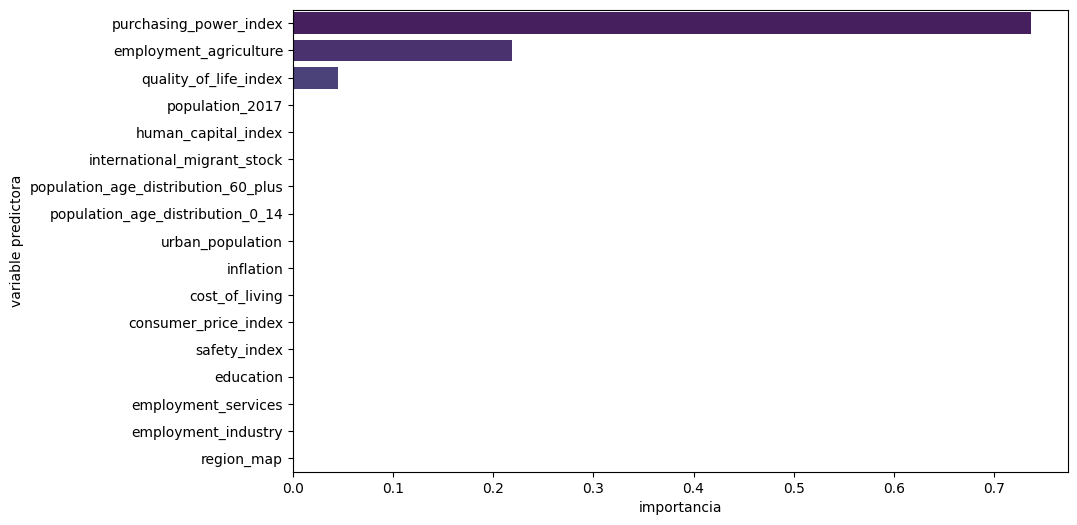

In [23]:
# ploteamos las variables predictoras ordenadas por importancia. 
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "variable predictora", data = importancia_predictoras, palette="viridis");
plt.show()

Llama la atención que tan solo 3 de las variables (`purchasing_power_index`, `employment_agriculture` y `quality_of_life_index`) tengan importancia en el modelo, a pesar de que tenemos 17 variables predictoras